In [2]:
import numpy as np
import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import shutil

In [2]:
labelsPath = os.path.join('/home/erwin/Pictures/PycharmProjects/yolo_image/yolo-coco', 'coco.names')
LABELS = open(labelsPath).read().strip().split("\n")

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

weightsPath = os.path.join('/home/erwin/Pictures/PycharmProjects/yolo_image/yolo-coco', "yolov3.weights")
configPath = os.path.join("/home/erwin/Pictures/PycharmProjects/yolo_image/yolo-coco", "yolov3.cfg")


FileNotFoundError: [Errno 2] No such file or directory: '/home/erwin/Pictures/PycharmProjects/yolo_image/yolo-coco/coco.names'

In [8]:
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

path_df = []
class_total_df = []
class_df = []
xmin_df = []
xmax_df = []
ymin_df = []
ymax_df = []
confidence_df = []
x_df = []
y_df = []
w_df = []
h_df = []
H_df = []
W_df = []

# data in single folder

In [7]:
try:
    if not os.path.exists("output_txt"):
        os.makedirs("output_txt")
        print("directory is ready!")
    if not os.path.exists("image_check"):
        os.makedirs("image_check")
        print("directory is ready!")
except OSError:
    print ('Error: Creating directory. ')


for img in os.listdir('data'):
    image = cv2.imread('data/'+img)
    image1 = image.copy()
    (H, W) = image.shape[:2]

    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
        swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)

    boxes = []
    confidences = []
    classIDs = []
    
    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > 0.5:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
    
    path = 'data/'+img
    file = open("output_txt/"+os.path.splitext(img)[0]+".txt", "w")
    
    size = W*H
    print(size)
    
    if size < 50000:
        shutil.move(path,'image_check')
    
    if len(idxs) == 0:
        shutil.move(path,'image_check')
    
    if len(idxs) > 0:
        for i in idxs.flatten():
            if LABELS[classIDs[i]] == "car" or LABELS[classIDs[i]] == "bicycle" or \
            LABELS[classIDs[i]] == "motorbike" or LABELS[classIDs[i]] == "truck" or \
            LABELS[classIDs[i]] == "bus" or LABELS[classIDs[i]] == "person":
                if classIDs[i] == 0:
                    classID = 5
                if classIDs[i] == 1:
                    classID = 4
                if classIDs[i] == 2:
                    classID = 0
                if classIDs[i] == 3:
                    classID = 3
                if classIDs[i] == 5:
                    classIDs = 1
                if classIDs[i] == 7:
                    classID = 2
                            
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                
                xmin = x
                xmax = x + w
                ymin = y
                ymax = y + h
                
                b = (float(xmin), float(xmax), float(ymin), float(ymax))
                x_yolo,y_yolo,w_yolo,h_yolo = convert((W,H), b)
                
                path_df += [path]
                class_total_df += [len(idxs)]
                class_df += [classID]
                xmin_df += [xmin]
                xmax_df += [xmax]
                ymin_df += [ymin]
                ymax_df += [ymax]
                x_df += [x_yolo]
                y_df += [y_yolo]
                w_df += [w_yolo]
                h_df += [h_yolo]
                W_df += [W]
                H_df += [H]
                confidence_df += [confidences[i]]
                data_txt =[]
                
                data_txt.append(str(classID)+" "+str(x_yolo)+" "+str(y_yolo)+" "+str(w_yolo)+" "+str(h_yolo))
        
                data = pd.DataFrame({'path': path_df, 'width': W_df, 'height': H_df ,'total_class': class_total_df, \
                                     'class_object' : class_df, 'xmin': xmin_df, 'xmax': xmax_df, 'ymin': ymin_df, 'ymax': ymax_df, \
                                    'x': x_df, 'y':y_df, 'w': w_df, 'h': h_df, 'confidence': confidence_df})
                listToStr = ' '.join(map(str, data_txt))
                file.write(listToStr+'\n')

                
    data.to_csv('data.csv',index=False)
    file.close()

375000
50246
50400
50325
50508


# data in multiple folder

In [15]:
try:
    if not os.path.exists("output_txt"):
        os.makedirs("output_txt")
        print("directory is ready!")
    if not os.path.exists("image_check"):
        os.makedirs("image_check")
        print("directory is ready!")
except OSError:
    print ('Error: Creating directory. ')
    
    
path_folder = 'data_multiple_folder/'


for folder in os.listdir(path_folder):
    for img in os.listdir(path_folder+folder):
        print(path_folder+folder+'/'+img)
        image = cv2.imread(path_folder+folder+'/'+img)
        image1 = image.copy()
        (H, W) = image.shape[:2]

        ln = net.getLayerNames()
        ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

        blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
            swapRB=True, crop=False)
        net.setInput(blob)
        start = time.time()
        layerOutputs = net.forward(ln)

        boxes = []
        confidences = []
        classIDs = []

        for output in layerOutputs:
            for detection in output:
                scores = detection[5:]
                classID = np.argmax(scores)
                confidence = scores[classID]

                if confidence > 0.5:
                    box = detection[0:4] * np.array([W, H, W, H])
                    (centerX, centerY, width, height) = box.astype("int")

                    x = int(centerX - (width / 2))
                    y = int(centerY - (height / 2))

                    boxes.append([x, y, int(width), int(height)])
                    confidences.append(float(confidence))
                    classIDs.append(classID)

        idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)

        path = 'data/'+img
        file = open("output_txt/"+os.path.splitext(img)[0]+".txt", "w")

        size = W*H
        print(size)

        if size < 50000:
            shutil.move(path,'image_check')

        if len(idxs) == 0:
            shutil.move(path,'image_check')

        if len(idxs) > 0:
            for i in idxs.flatten():
                if LABELS[classIDs[i]] == "car" or LABELS[classIDs[i]] == "bicycle" or \
                LABELS[classIDs[i]] == "motorbike" or LABELS[classIDs[i]] == "truck" or \
                LABELS[classIDs[i]] == "bus" or LABELS[classIDs[i]] == "person":
                    if classIDs[i] == 0:
                        classID = 5
                    if classIDs[i] == 1:
                        classID = 4
                    if classIDs[i] == 2:
                        classID = 0
                    if classIDs[i] == 3:
                        classID = 3
                    if classIDs[i] == 5:
                        classIDs = 1
                    if classIDs[i] == 7:
                        classID = 2

                    (x, y) = (boxes[i][0], boxes[i][1])
                    (w, h) = (boxes[i][2], boxes[i][3])

                    xmin = x
                    xmax = x + w
                    ymin = y
                    ymax = y + h

                    b = (float(xmin), float(xmax), float(ymin), float(ymax))
                    x_yolo,y_yolo,w_yolo,h_yolo = convert((W,H), b)

                    path_df += [path]
                    class_total_df += [len(idxs)]
                    class_df += [classID]
                    xmin_df += [xmin]
                    xmax_df += [xmax]
                    ymin_df += [ymin]
                    ymax_df += [ymax]
                    x_df += [x_yolo]
                    y_df += [y_yolo]
                    w_df += [w_yolo]
                    h_df += [h_yolo]
                    W_df += [W]
                    H_df += [H]
                    confidence_df += [confidences[i]]
                    data_txt =[]

                    data_txt.append(str(classID)+" "+str(x_yolo)+" "+str(y_yolo)+" "+str(w_yolo)+" "+str(h_yolo))

                    data = pd.DataFrame({'path': path_df, 'width': W_df, 'height': H_df ,'total_class': class_total_df, \
                                         'class_object' : class_df, 'xmin': xmin_df, 'xmax': xmax_df, 'ymin': ymin_df, 'ymax': ymax_df, \
                                        'x': x_df, 'y':y_df, 'w': w_df, 'h': h_df, 'confidence': confidence_df})
                    listToStr = ' '.join(map(str, data_txt))
                    file.write(listToStr+'\n')


        data.to_csv('data.csv',index=False)
        file.close()

data_multiple_folder/mobil2/download.jpeg
50325
data_multiple_folder/mobil3/download (1).jpeg
50508
data_multiple_folder/mobil5/images.jpeg
50246
data_multiple_folder/mobil4/download (2).jpeg
50400
data_multiple_folder/mobil1/1983934978.jpg
375000


In [144]:
#                 x1, y1 = int((x_yolo - h_yolo/2)*W), int((y_yolo - w_yolo/2)*H)
#                 x2, y2 = int((x_yolo + h_yolo/2)*W), int((y_yolo + w_yolo/2)*H)
                
# +x_yolo+y_yolo+w_yolo+h_yolo
            
                
#     cv2.imwrite(img,image)
#     fig = plt.figure()
#     a = fig.add_subplot(1, 2, 1)
#     imgplot = plt.imshow(image) 
#     a.set_title('Before')
#     plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
#     fig = plt.figure()
#     a = fig.add_subplot(1, 2, 2)
#     imgplot = plt.imshow(image1)
#     a.set_title('After')
#     plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
# image = cv2.imread('data/plate-29.jpg')
# fig = plt.figure()
# a = fig.add_subplot(1, 2, 1)
# imgplot = plt.imshow(image) 
# a.set_title('Before')
# plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

In [4]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)
    
    

In [3]:
data_ = pd.read_csv('data.csv')
data_.head(100)

,path,width,height,total_class,class_object,xmin,xmax,ymin,ymax,x,y,w,h,confidence
0,images/motor_honda_cbr\n/3.motor-new-honda-cbr...,2484,2472,1,3,265,2254,122,2323,0.507045,0.494539,0.800725,0.890372,0.999789
1,images/motor_honda_cbr\n/14.2013-Honda-CBR1000...,1600,1200,1,3,42,1558,104,1115,0.500000,0.507917,0.947500,0.842500,0.999560
2,images/motor_honda_cbr\n/93.maxresdefault.jpg,1280,720,1,3,45,998,106,622,0.407422,0.505556,0.744531,0.716667,0.987917
3,images/motor_honda_cbr\n/46.Brosur-Motor-Honda...,2000,1436,1,3,342,1694,417,1422,0.509000,0.640320,0.676000,0.699861,0.999250
4,images/mobil_audi_q5\n/33.46061-Audi_Q5.jpg,1920,1080,1,0,431,1497,124,1010,0.502083,0.525000,0.555208,0.820370,0.978141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,images/mobil_audi_q5\n/86.Harga%2BMobil%2BAudi...,450,302,2,0,12,438,10,281,0.500000,0.481788,0.946667,0.897351,0.988914
96,images/mobil_audi_q5\n/41.audi-q5-front-angle-...,500,333,1,0,101,407,86,241,0.508000,0.490991,0.612000,0.465465,0.950528
97,images/mobil_audi_q5\n/75.audi-q5-s-line-by-pr...,768,576,1,0,49,688,111,475,0.479818,0.508681,0.832031,0.631944,0.996908
98,images/mobil_audi_q5\n/14.harga-Mobil-Audi-Q5-...,570,308,1,0,27,544,21,293,0.500877,0.509740,0.907018,0.883117,0.847589


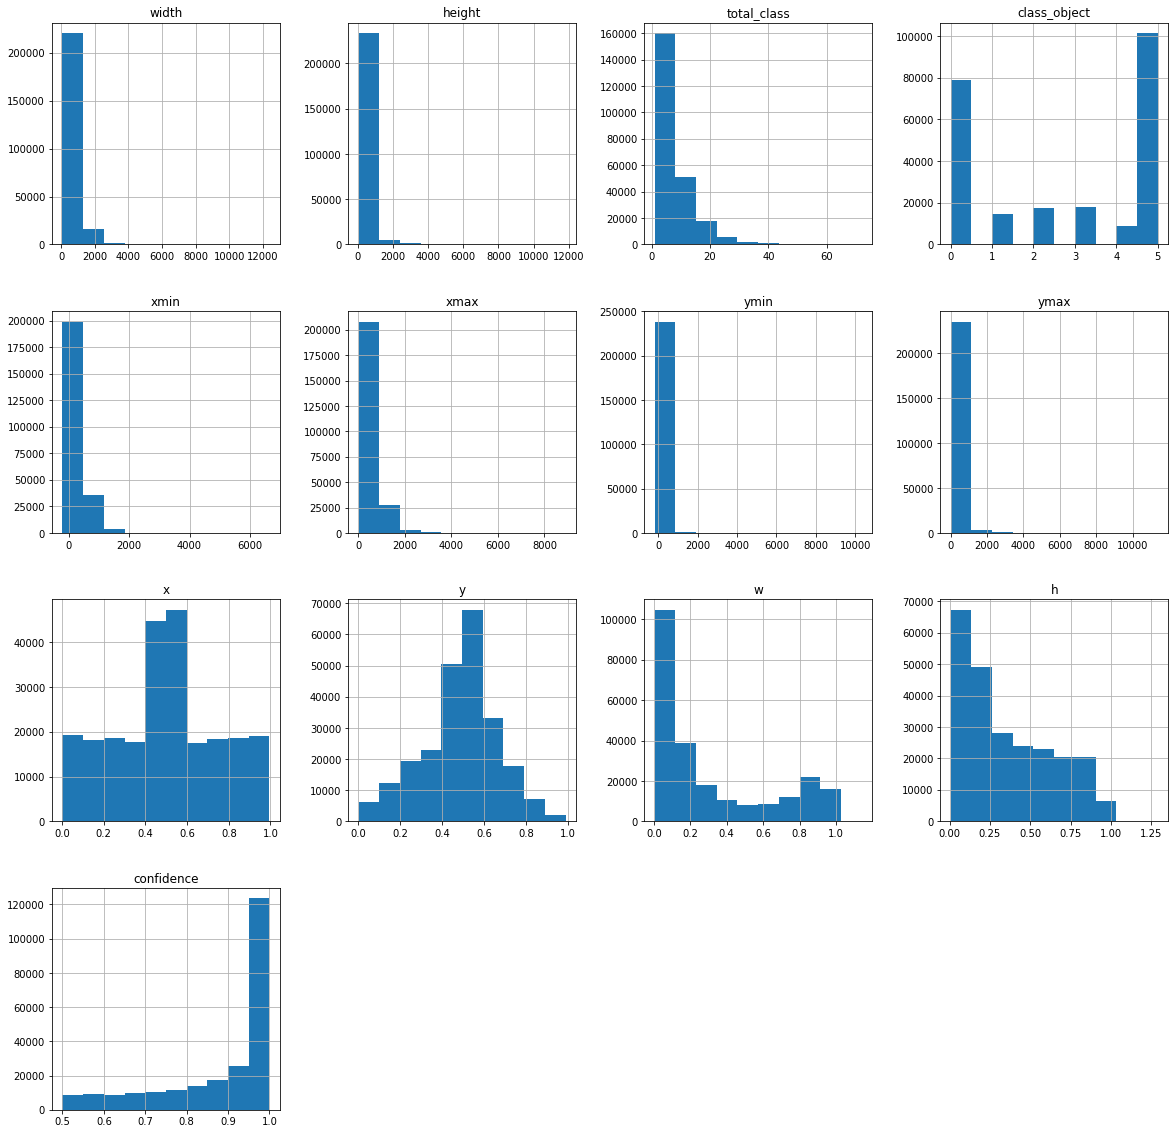

In [4]:
data_.hist(figsize=(20,20))
plt.show()

In [9]:
data_['height'].max()

11811

In [22]:
print("Normalised vehicle_type distribution of data image in the dataset: car = {:.1f}%; bus {:.1f}%; truck {:.1f}%; motorbike {:.1f}%; becycle {:.1f}%; person {:.1f}%.".format(
    (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 0)].shape[0] / data_.shape[0])*100, \
    (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 1)].shape[0] / data_.shape[0])*100, \
    (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 2)].shape[0] / data_.shape[0])*100, \
    (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 3)].shape[0] / data_.shape[0])*100, \
    (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 4)].shape[0] / data_.shape[0])*100, \
    (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 5)].shape[0] / data_.shape[0])*100))

Normalised vehicle_type distribution of data image in the dataset: car = 33.0%; bus 6.0%; truck 7.3%; motorbike 7.5%; becycle 3.7%; person 42.4%.


In [6]:
data_['path'].value_counts().head()

images/komunitas_mobil\n/68.komunitas-mobil-tolak-wacana-pembatasan-usia-kendaraan-GnYtnTS2dz.jpg              72
images/fix/1592166.jpg                                                                                         68
images/fix/2316235.jpg                                                                                         58
images/car_coco/COCO_train2014_000000360374.jpg                                                                55
images/motor_di_jalan\n/23.wacana-larangan-sepeda-motor-melintas-di-jalan-rasuna-said-menuai-protes-FYq.jpg    51
Name: path, dtype: int64

0.9999752044677734


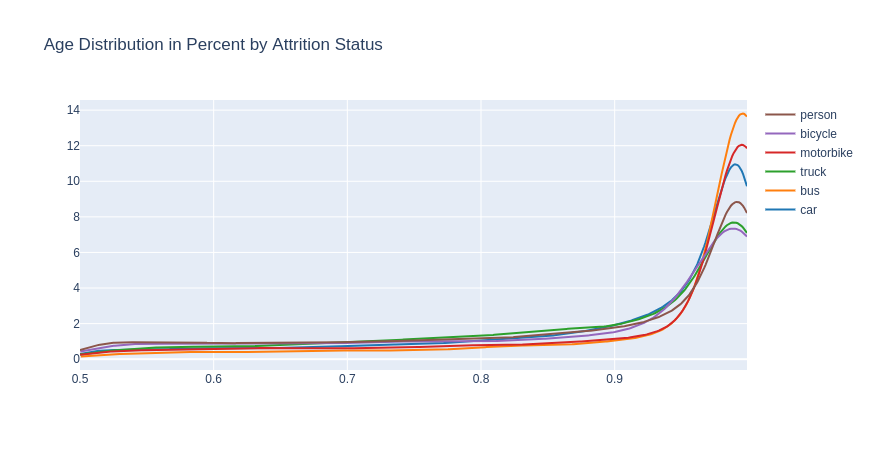

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import scipy
import plotly.graph_objects as go

# Create data
# N = 60
car = data_.loc[(data_['class_object'] == 0) & (data_['height'] > 416), "confidence"]
bus = data_.loc[(data_['class_object'] == 1) & (data_['height'] > 416), "confidence"]
truck = data_.loc[(data_['class_object'] == 2) & (data_['height'] > 416), "confidence"]
motorbike = data_.loc[(data_['class_object'] == 3) & (data_['height'] > 416), "confidence"]
bicycle = data_.loc[(data_['class_object'] == 4) & (data_['height'] > 416), "confidence"]
person = data_.loc[(data_['class_object'] == 5) & (data_['height'] > 416), "confidence"]

# x = list(range(len(car)))
print(max(car))

hist_data = [car, bus, truck, motorbike, bicycle, person]
group_labels = ['car', 'bus', "truck", "motorbike", "bicycle", "person"]

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Age Distribution in Percent by Attrition Status')
# fig['layout'].update(xaxis=dict(range=[15, 60], dtick=5))
# Plot
# py.plot(fig, filename='Distplot with Multiple Datasets',auto_open=False)
# plotly.offline.plot(fig)

fig_ = go.Figure(fig)
fig.show()

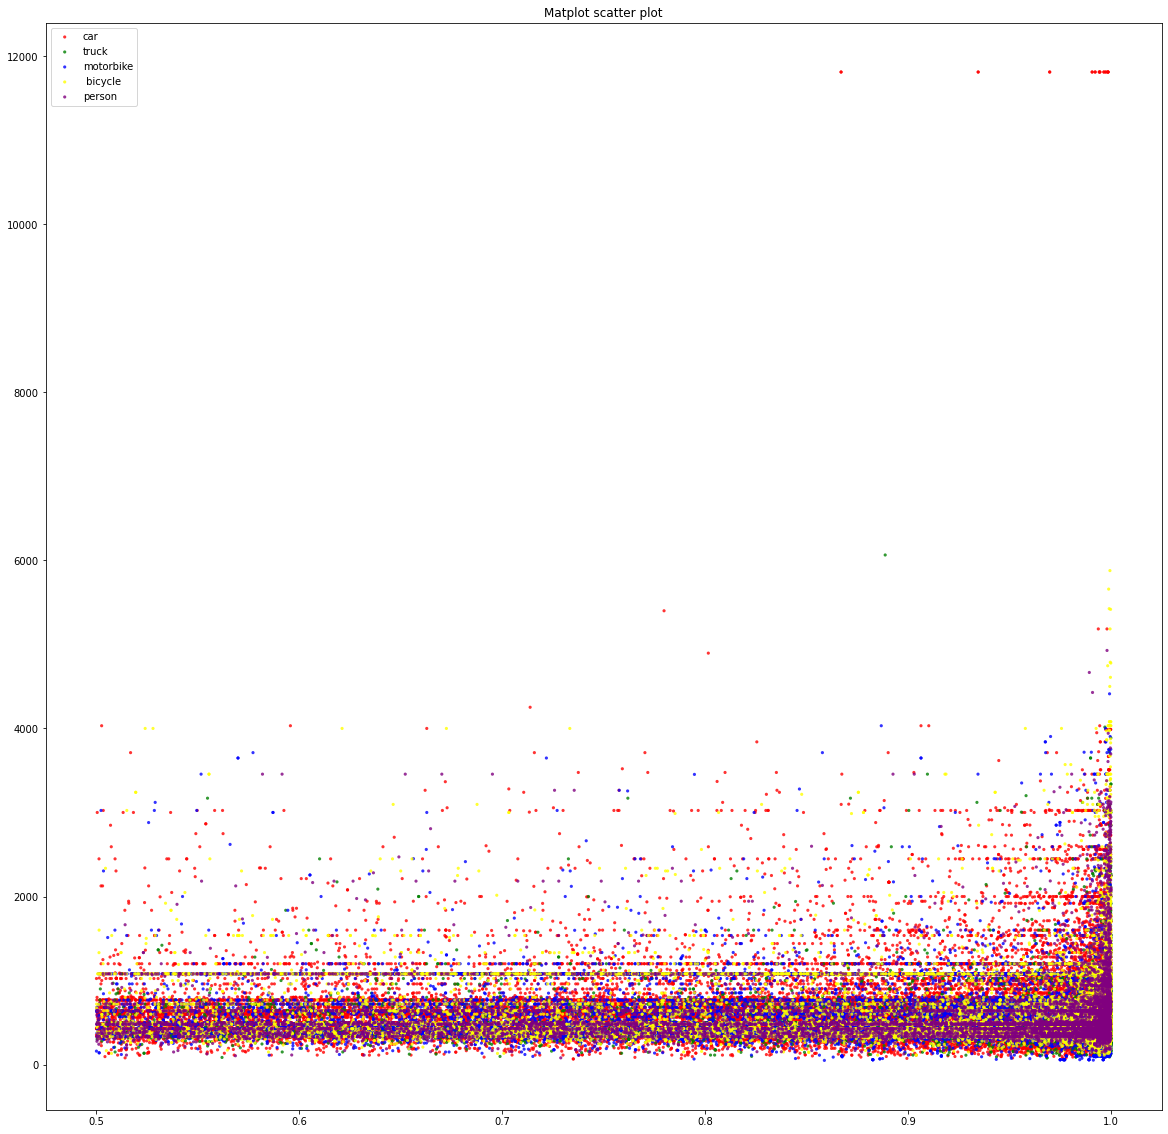

In [15]:
car = (data_.loc[data_['class_object'] == 0, "confidence"],data_.loc[data_['class_object'] == 0, "height"])
bus = (data_.loc[data_['class_object'] == 1, "confidence"],data_.loc[data_['class_object'] == 1, "height"])
truck = (data_.loc[data_['class_object'] == 2, "confidence"],data_.loc[data_['class_object'] == 2, "height"])
motorbike = (data_.loc[data_['class_object'] == 3, "confidence"],data_.loc[data_['class_object'] == 3, "height"])
bicycle = (data_.loc[data_['class_object'] == 4, "confidence"],data_.loc[data_['class_object'] == 4, "height"])
person = (data_.loc[data_['class_object'] == 5, "confidence"],data_.loc[data_['class_object'] == 5, "height"])

data = (car, bus, truck, motorbike, bicycle, person)
colors = ("red", "green", "blue", "yellow", 'purple')
groups = ("car", "truck", "motorbike", " bicycle", "person")

# print(data)
# # Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=10, label=group)
    
plt.title('Matplot scatter plot')
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc=2)
plt.show()


5    101421
0     78971
3     17989
2     17585
1     14458
4      8840
dtype: int64


<AxesSubplot:title={'center':'Data train'}>

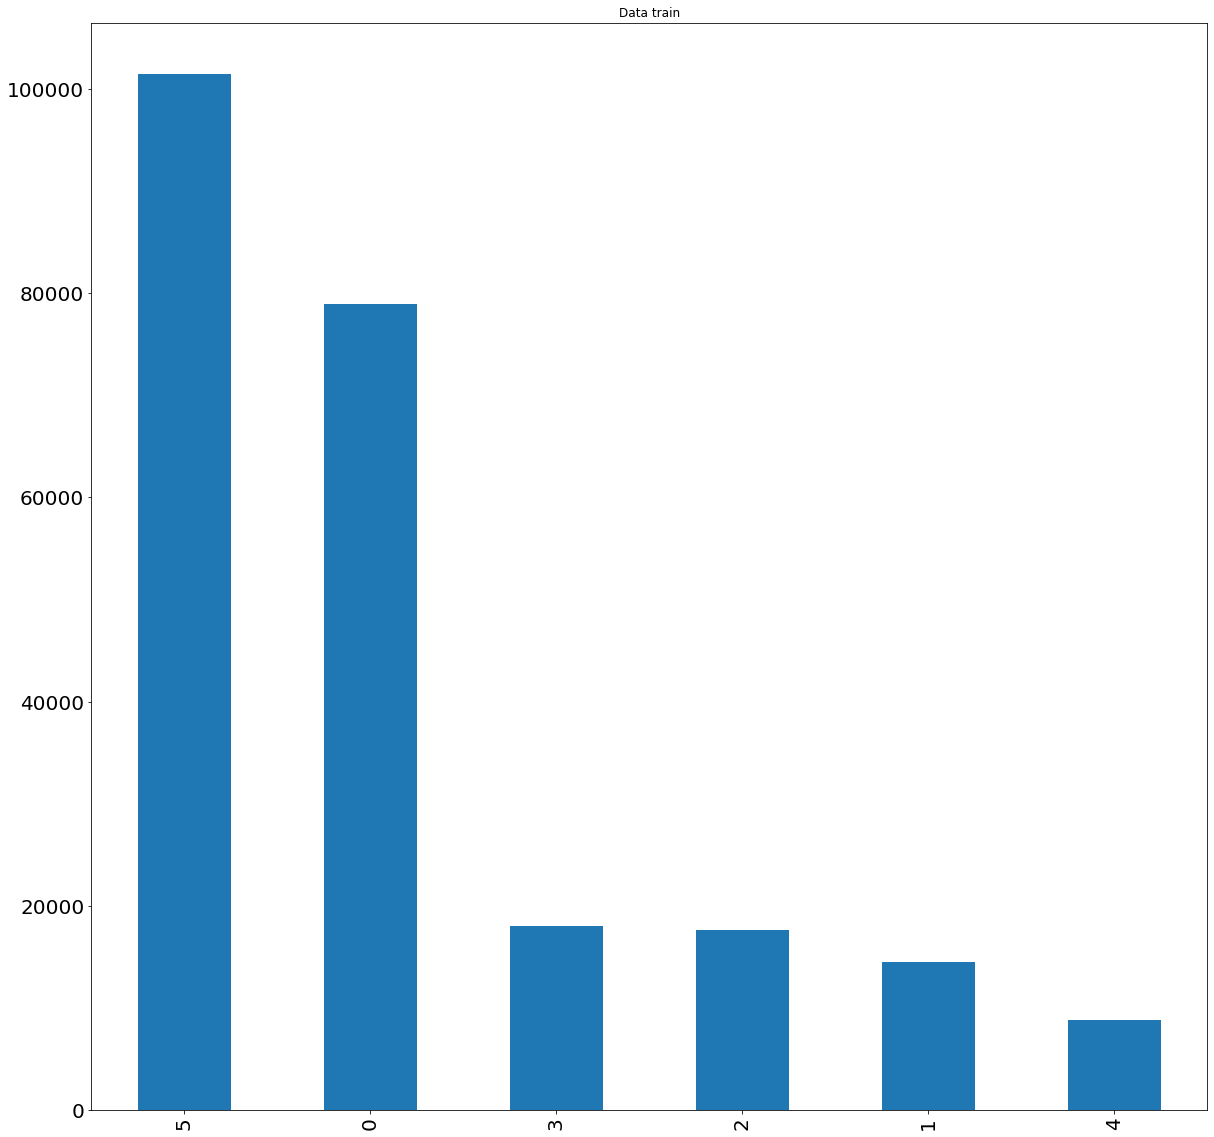

In [89]:
# print(data_["class_object"].value_counts())

CountStatus = pd.value_counts(data_['class_object'].values, sort=True)
print(CountStatus)
CountStatus.plot.bar(title="Data train",fontsize=20 )

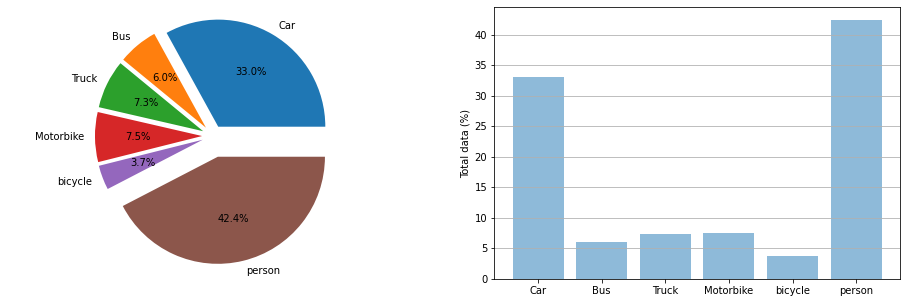

In [88]:
# car_percent = (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 0)].shape[0] / data_.shape[0])*100
bus_percent = (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 1)].shape[0] / data_.shape[0])*100
truck_percent = (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 2)].shape[0] / data_.shape[0])*100
motorbike_percent = (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 3)].shape[0] / data_.shape[0])*100
bicycle_percent = (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 4)].shape[0] / data_.shape[0])*100
person_percent = (data_[(data_['confidence'] >= 0.5) & (data_['class_object'] == 5)].shape[0] / data_.shape[0])*100

# make figure and assign axis objects
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [car_percent, bus_percent, truck_percent, motorbike_percent, bicycle_percent, person_percent]
labels = ['Car', 'Bus', 'Truck', 'Motorbike', 'bicycle', 'person']
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', labels=labels, explode=explode)

ax1.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
# ax1.set_title('Engineering Diciplines')

ax2.bar(labels, ratios, align='center', alpha=0.5)
ax2.set_ylabel('Total data (%)')
ax2.set_xticks(labels)
ax2.set_xticklabels(labels)
# ax2.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax2.yaxis.grid(True)

# plt.title("Data Train")
plt.show()

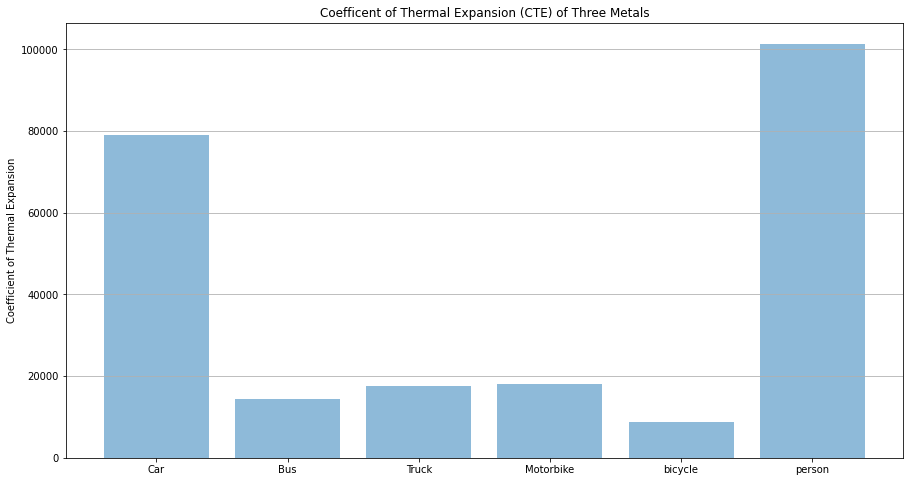

In [109]:
car_total = (data_.loc[data_['class_object'] == 0]).shape[0]
bus_total = (data_.loc[data_['class_object'] == 1]).shape[0]
truck_total = (data_.loc[data_['class_object'] == 2]).shape[0]
motorbike_total = (data_.loc[data_['class_object'] == 3]).shape[0]
bicycle_total = (data_.loc[data_['class_object'] == 4]).shape[0]
person_total = (data_.loc[data_['class_object'] == 5]).shape[0]

ratios_total = [car_total, bus_total, truck_total, motorbike_total, bicycle_total, person_total]
labels_total = ['Car', 'Bus', 'Truck', 'Motorbike', 'bicycle', 'person']

# fig = plt.figure(figsize=(4,3))
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(labels_total, ratios_total, align='center', alpha=0.5)
ax.set_ylabel('Coefficient of Thermal Expansion')
ax.set_xticks(labels_total)
ax.set_xticklabels(labels_total)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
# plt.savefig('bar_plot.png')
plt.show()

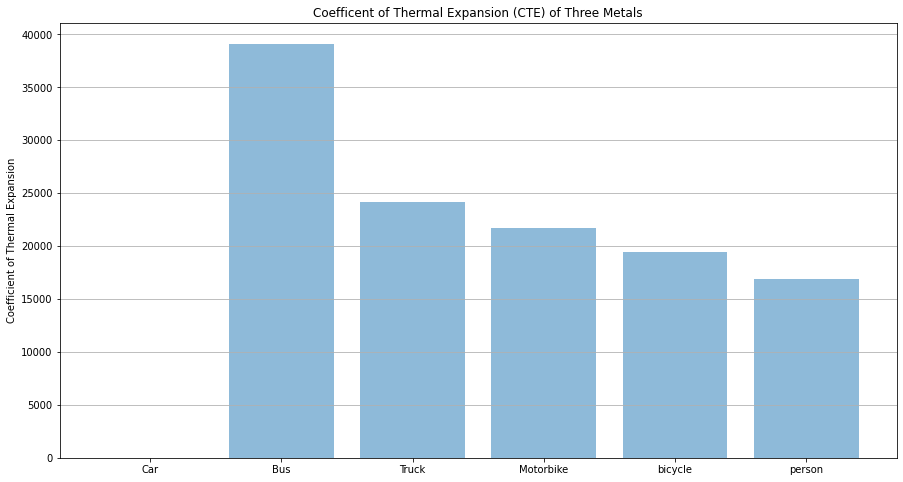

In [111]:
car_total = (data_.loc[data_['total_class'] == 0]).shape[0]
bus_total = (data_.loc[data_['total_class'] == 1]).shape[0]
truck_total = (data_.loc[data_['total_class'] == 2]).shape[0]
motorbike_total = (data_.loc[data_['total_class'] == 3]).shape[0]
bicycle_total = (data_.loc[data_['total_class'] == 4]).shape[0]
person_total = (data_.loc[data_['total_class'] == 5]).shape[0]

ratios_total = [car_total, bus_total, truck_total, motorbike_total, bicycle_total, person_total]
labels_total = ['Car', 'Bus', 'Truck', 'Motorbike', 'bicycle', 'person']

# fig = plt.figure(figsize=(4,3))
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(labels_total, ratios_total, align='center', alpha=0.5)
ax.set_ylabel('Coefficient of Thermal Expansion')
ax.set_xticks(labels_total)
ax.set_xticklabels(labels_total)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
# plt.savefig('bar_plot.png')
plt.show()

In [4]:
data_csv = pd.read_csv('/home/iwin/Downloads/public transport history.csv')

In [8]:
data_csv.head(10)

,_id,devicetime,id,latitude,longitude,name,phone,servertime,speed
0,5a77860921045f8788ceeda0,2018-02-04T22:09:27.587Z,9,-6.890165,107.584317,24 | D1994AA,8.961663e+10,2018-02-04T22:09:27.588Z,0.000000
1,5a77860921045f8788ceeda2,2018-02-01T02:41:17.000Z,5,-6.907391,107.606862,24 | D1988AG,8.961663e+10,2018-02-01T09:41:17.919Z,10.799140
2,5a77860921045f8788ceeda4,2018-02-04T22:13:07.168Z,7,-6.874632,107.589520,24 | D1978CF,8.961663e+10,2018-02-04T22:13:07.169Z,0.000000
3,5a77860921045f8788ceeda6,2018-02-04T22:13:18.472Z,6,-6.890798,107.599627,24 | D1977AC,8.961663e+10,2018-02-04T22:13:18.473Z,0.000000
4,5a77860921045f8788ceeda8,2018-02-04T22:14:53.279Z,3,-6.888002,107.571920,24 | D1991AN,8.961663e+10,2018-02-04T22:14:53.280Z,0.000000
5,5a77860921045f8788ceedaa,2018-02-03T04:52:24.082Z,4,-6.882928,107.569093,24 | D1967BJ,8.961663e+10,2018-02-03T04:52:24.083Z,0.000000
6,5a77860921045f8788ceedac,2018-02-04T22:15:05.665Z,8,-6.895330,107.560222,24 | D1985AD,8.961663e+10,2018-02-04T22:15:05.666Z,0.539957
7,5a77861421045f8788ceedad,2018-02-04T22:09:27.587Z,9,-6.890165,107.584317,24 | D1994AA,8.961663e+10,2018-02-04T22:09:27.588Z,0.000000
8,5a77861421045f8788ceedae,2018-02-01T02:41:17.000Z,5,-6.907391,107.606862,24 | D1988AG,8.961663e+10,2018-02-01T09:41:17.919Z,10.799140
9,5a77861421045f8788ceedaf,2018-02-04T22:13:07.168Z,7,-6.874632,107.589520,24 | D1978CF,8.961663e+10,2018-02-04T22:13:07.169Z,0.000000


In [13]:
data_csv['latitude'].value_counts()

-6.896188    1051052
-6.899710    1051012
-6.889364    1050989
-6.895287    1050937
-6.891583    1050793
              ...   
-6.938328          1
-6.849823          1
-6.877273          1
-6.829420          1
-6.977077          1
Name: latitude, Length: 43224, dtype: int64